In [1]:
# モジュールのインポート
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# ドライブのマウント
drive.mount('/content/drive')

# 画像ディレクトリパス
# 一般的に定数は大文字、または短縮形で書くことが多いです
IMG_DIR = '/content/drive/MyDrive/img2025/image/'

Mounted at /content/drive


In [2]:
def show_result(src, dst, title_src='Original', title_dst='Result'):
    """
    変換前後の画像を比較表示する関数
    src: 元画像 (Source)
    dst: 変換後画像 (Destination)
    """
    plt.figure(figsize=(10, 5))

    # 元画像
    plt.subplot(1, 2, 1)
    plt.title(title_src)
    plt.imshow(src, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

    # 結果画像
    plt.subplot(1, 2, 2)
    plt.title(title_dst)
    plt.imshow(dst, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def plot_hist(img, title='Histogram'):
    """
    画像のヒストグラムを表示する関数
    """
    # OpenCVでヒストグラムを算出
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.plot(hist, color='black')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])
    plt.grid(True, linestyle='--', alpha=0.6) # グリッドを少し見やすく調整
    plt.tight_layout()
    plt.show()

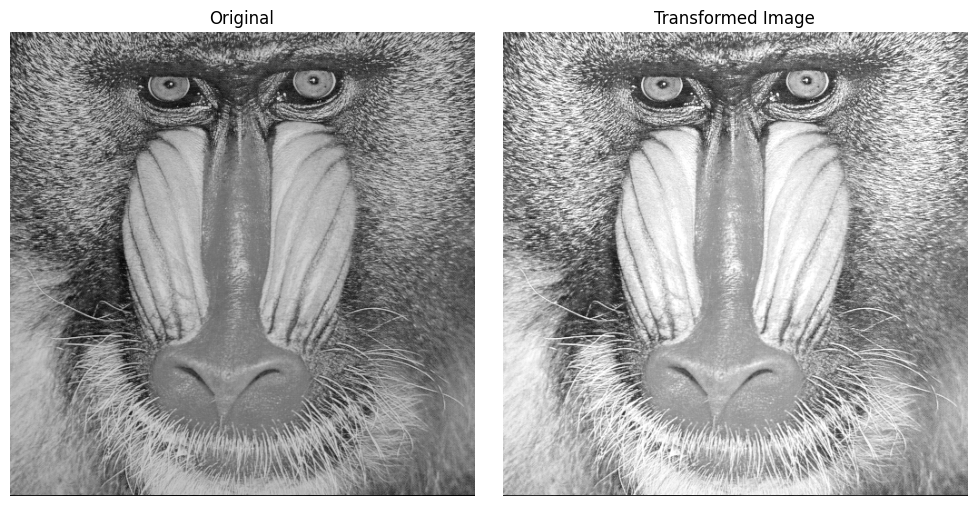

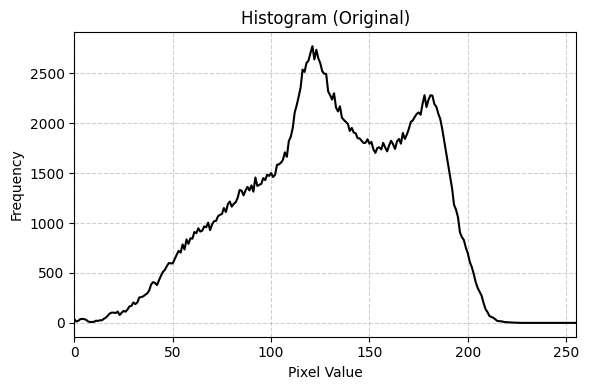

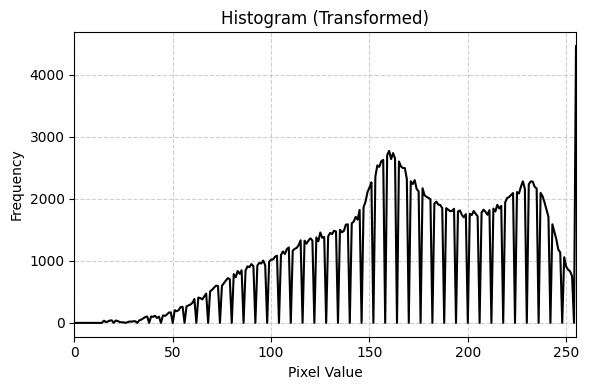

True

In [3]:
# ----------------------------------------------------------------
# 課題1: 線形変換による濃度変換
# ----------------------------------------------------------------

# 画像読み込み (Source)
src = cv2.imread(IMG_DIR + 'gray_image.png', cv2.IMREAD_GRAYSCALE)

# 出力画像 (Destination) の初期化
h, w = src.shape
dst = np.zeros((h, w), dtype=np.uint8)

# 画素ごとの処理
for y in range(h):
    for x in range(w):
        val = src[y, x]

        # 条件分岐による線形変換
        if val <= 200:
            new_val = 1.2 * val + 15
        else:
            new_val = 255

        dst[y, x] = int(new_val)

# 結果表示
show_result(src, dst, title_dst='Transformed Image')

# ヒストグラム表示
plot_hist(src, 'Histogram (Original)')
plot_hist(dst, 'Histogram (Transformed)')

# 保存
cv2.imwrite(IMG_DIR + 'transformed_image.png', dst)

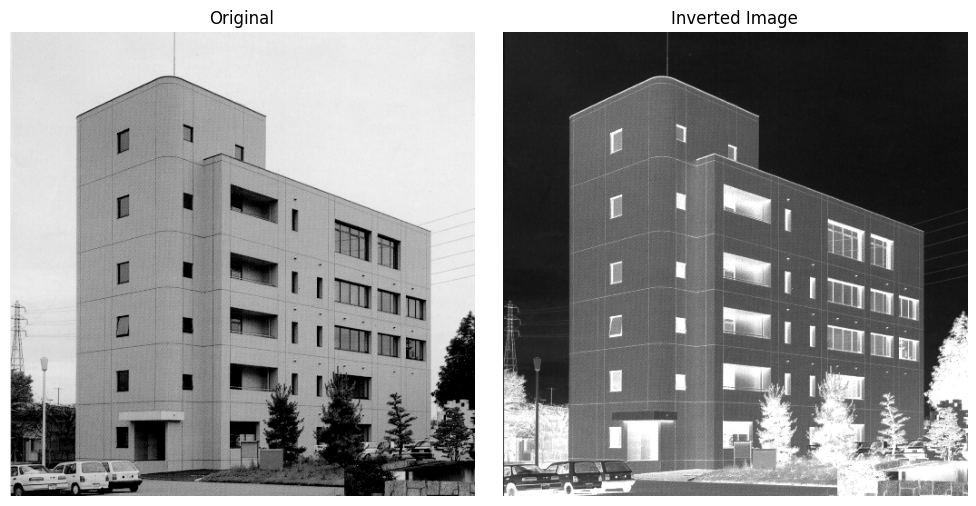

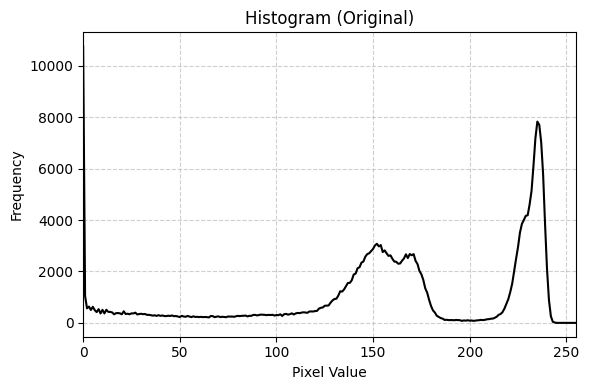

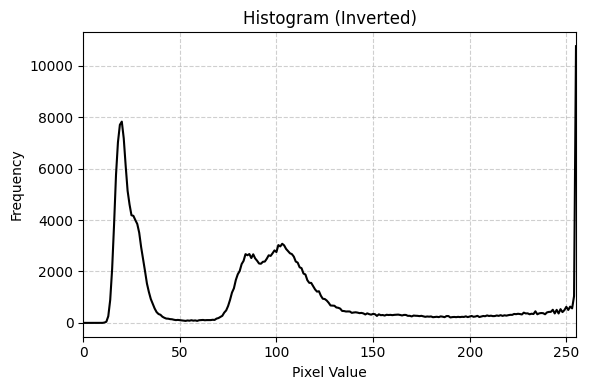

True

In [4]:
# ----------------------------------------------------------------
# 課題2: 輝度反転
# ----------------------------------------------------------------

# 画像読み込み
src = cv2.imread(IMG_DIR + 'building.png', cv2.IMREAD_GRAYSCALE)

# 線形変換 (alpha=-1, beta=255 で反転)
dst = cv2.convertScaleAbs(src, alpha=-1, beta=255)

# 結果表示
show_result(src, dst, title_dst='Inverted Image')

# ヒストグラム表示
plot_hist(src, 'Histogram (Original)')
plot_hist(dst, 'Histogram (Inverted)')

# 保存
cv2.imwrite(IMG_DIR + 'inverted_image.png', dst)

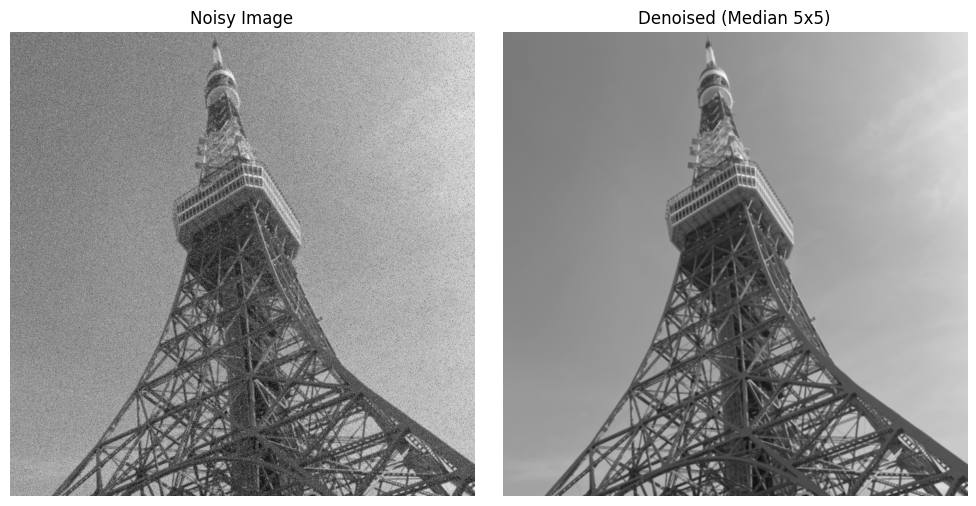

True

In [5]:
# ----------------------------------------------------------------
# 課題3: メディアンフィルタによるノイズ除去
# ----------------------------------------------------------------

# 画像読み込み
src = cv2.imread(IMG_DIR + 'noisy_image.png', cv2.IMREAD_GRAYSCALE)

# フィルタ適用 (ksize: Kernel Size)
ksize = 5
dst = cv2.medianBlur(src, ksize)

# 結果表示
show_result(src, dst, title_src='Noisy Image', title_dst=f'Denoised (Median {ksize}x{ksize})')

# 保存
cv2.imwrite(IMG_DIR + 'denoised_image.png', dst)

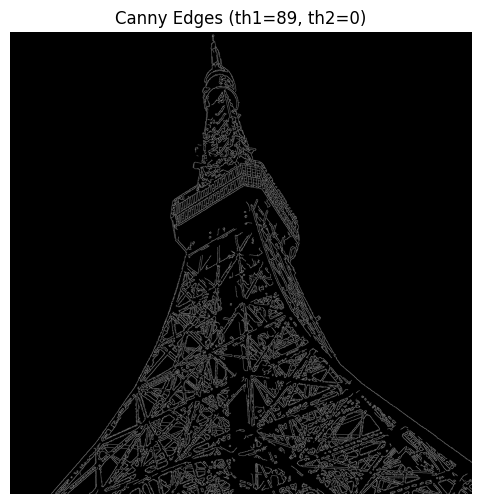

True

In [ ]:
# ----------------------------------------------------------------
# 課題4: Canny法によるエッジ検出
# ----------------------------------------------------------------

# ノイズ除去済み画像の読み込み
src = cv2.imread(IMG_DIR + 'denoised_image.png', cv2.IMREAD_GRAYSCALE)

# しきい値設定 (Threshold)
th1 = 75 # @param {"type":"slider","min":0,"max":360,"step":1}
th2 = 92 # @param {"type":"slider","min":0,"max":360,"step":1}

# エッジ検出
edges = cv2.Canny(src, th1, th2)

# 結果表示
plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title(f'Canny Edges (th1={th1}, th2={th2})')
plt.axis('off')
plt.show()

# 保存
cv2.imwrite(IMG_DIR + 'canny_edge_image.png', edges)